In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].str.replace(".","")
crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].str.replace(" ", "")
crypto_df['TotalCoinSupply'] = pd.to_numeric(crypto_df['TotalCoinSupply'])

C:\Users\Rob\AppData\Local\Temp/ipykernel_10724/4075814076.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  crypto_df['TotalCoinSupply'] = crypto_df['TotalCoinSupply'].str.replace(".","")


In [5]:
crypto_df = crypto_df.loc[crypto_df['IsTrading']==True]
crypto_df = crypto_df.drop(columns = ['IsTrading','Unnamed: 0', "CoinName"])

In [6]:
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] > 0]

In [7]:
crypto_df = crypto_df.dropna()
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
crypto_dummies = pd.get_dummies(crypto_df)
crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Note that there are now 98 columns.

In [9]:
algo_list = crypto_df['Algorithm'].unique().tolist()
algo_list.sort()
algo_list

['1GB AES Pattern Search',
 '536',
 'Argon2d',
 'BLAKE256',
 'Blake',
 'Blake2S',
 'Blake2b',
 'C11',
 'Cloverhash',
 'Counterparty',
 'CryptoNight',
 'CryptoNight Heavy',
 'CryptoNight-V7',
 'Cryptonight-GPU',
 'DPoS',
 'Dagger',
 'Dagger-Hashimoto',
 'ECC 256K1',
 'Equihash',
 'Equihash+Scrypt',
 'Ethash',
 'Exosis',
 'Green Protocol',
 'Groestl',
 'HMQ1725',
 'HybridScryptHash256',
 'IMesh',
 'Jump Consistent Hash',
 'Keccak',
 'Leased POS',
 'Lyra2RE',
 'Lyra2REv2',
 'Lyra2Z',
 'M7 POW',
 'Multiple',
 'NIST5',
 'NeoScrypt',
 'Ouroboros',
 'PHI1612',
 'POS 2.0',
 'POS 3.0',
 'PoS',
 'Proof-of-Authority',
 'Proof-of-BibleHash',
 'QUAIT',
 'QuBit',
 'Quark',
 'SHA-256',
 'SHA-256 + Hive',
 'SHA-256D',
 'SHA-512',
 'SHA3',
 'Scrypt',
 'Semux BFT consensus',
 'Shabal256',
 'Skein',
 'SkunkHash',
 'SkunkHash v2 Raptor',
 'Stanford Folding',
 'TRC10',
 'Time Travel',
 'Tribus',
 'VBFT',
 'VeChainThor Authority',
 'X11',
 'X11GOST',
 'X13',
 'X14',
 'X15',
 'X16R',
 'XEVAN']

In [10]:
proof_list = crypto_df['ProofType'].unique().tolist()
proof_list.sort()
proof_list

['DPOS',
 'DPoS',
 'HPoW',
 'LPoS',
 'POBh',
 'PoA',
 'PoC',
 'PoS',
 'PoS/LPoS',
 'PoS/PoW',
 'PoS/PoW/PoT',
 'PoST',
 'PoW',
 'PoW + Hive',
 'PoW and PoS',
 'PoW/PoS',
 'PoW/PoS ',
 'PoW/PoW',
 'PoW/nPoS',
 'Pos',
 'Proof of Authority',
 'Proof of Trust',
 'TPoS',
 'Zero-Knowledge Proof',
 'dPoW/PoW']

In [11]:
crypto_scaled = StandardScaler().fit_transform(crypto_dummies)
crypto_scaled

array([[-0.11710817, -0.05621025, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.05620339, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, -0.0521619 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.05619221, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.05620998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.05621024, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### PCA reduction

In [12]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get principle components which preserver 99% of explained variance.
crypto_pca = pca.fit_transform(crypto_scaled)

In [13]:
crypto_pca

array([[-2.73155410e-01,  1.11278292e+00, -5.51157431e-01, ...,
         2.84719191e-14, -4.09058869e-15, -4.01092966e-14],
       [-2.60761460e-01,  1.11151396e+00, -5.51710904e-01, ...,
         2.81614903e-14, -5.70060624e-15, -3.96910159e-14],
       [ 1.91273619e-01,  1.83516259e+00, -6.05335087e-01, ...,
        -1.36514002e-12,  3.18835997e-13,  2.03566434e-12],
       ...,
       [-1.21384220e-01, -2.31450501e+00,  3.74916397e-01, ...,
        -1.10408990e-14, -9.81685604e-15, -3.81109334e-14],
       [-2.67369173e-01, -2.06360707e+00,  3.66329554e-01, ...,
         3.18794806e-14, -8.08595899e-15, -4.17789383e-14],
       [-1.40452414e-01,  8.68492462e-01, -2.64696771e-01, ...,
         3.11648578e-14, -7.94306889e-15, -4.41459206e-14]])

In [14]:
pca.explained_variance_ratio_

array([0.02310262, 0.02139331, 0.02051848, 0.0204466 , 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042488, 0.01858792, 0.01746555,
       0.01649113, 0.01623884, 0.01595856, 0.01550531, 0.01438243,
       0.01321016, 0.01238907, 0.01208905, 0.01101843, 0.01060949,
       0.01051367, 0.01040944, 0.01039058, 0.0103773 , 0.01035763,
       0.01034103, 0.01029588, 0.01028139, 0.01028139, 0.01028139,
       0.01028138, 0.01027955, 0.01027051, 0.0102634 , 0.01026195,
       0.01025645, 0.01025098, 0.01024955, 0.0102431 , 0.01024259,
       0.01024259, 0.01024259, 0.01024167, 0.01024017, 0.01023558,
       0.01023432, 0.01023022, 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.01022

In [15]:
crypto_pca.shape

(532, 75)

In [16]:
crypto_pca_df = pd.DataFrame( data=crypto_pca)
crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.273155,1.112783,-0.551157,-4.419543e-06,-3.317758e-12,-3.798002e-12,-2.291890e-12,0.005376,-1.278838,-0.334864,...,-2.378516e-15,2.853205e-15,-1.100336e-15,-1.654929e-14,1.889452e-14,-7.751141e-15,-1.043285e-14,2.847192e-14,-4.090589e-15,-4.010930e-14
1,-0.260761,1.111514,-0.551711,-4.419568e-06,-3.317691e-12,-3.798079e-12,-2.291759e-12,0.004673,-1.281214,-0.335641,...,-2.744758e-15,2.457004e-15,-1.449548e-15,-1.636993e-14,2.022130e-14,-8.035216e-15,-1.014589e-14,2.816149e-14,-5.700606e-15,-3.969102e-14
2,0.191274,1.835163,-0.605335,-5.628946e-06,-4.203611e-12,-4.832323e-12,-2.921310e-12,-0.020704,-1.047089,-0.256314,...,1.580645e-13,-1.532421e-13,-9.247318e-15,8.791289e-13,-1.065341e-12,3.798716e-13,3.992156e-13,-1.365140e-12,3.188360e-13,2.035664e-12
3,-0.182215,-1.335485,0.164367,2.113391e-06,1.596863e-12,1.818780e-12,1.099806e-12,-0.011621,0.188085,0.097678,...,2.894808e-16,1.607603e-15,-4.652848e-15,-4.234431e-15,-1.574349e-14,-6.852614e-15,-3.533930e-15,1.390598e-14,-4.267234e-15,-2.465267e-14
4,-0.273550,-2.047402,0.350189,4.037390e-06,3.041183e-12,3.472332e-12,2.096535e-12,0.014640,0.441828,0.180211,...,-6.613452e-14,1.272290e-13,-9.809202e-14,5.222745e-14,-7.076718e-14,-1.225348e-13,-7.273430e-14,1.760437e-14,-6.082540e-15,-3.459813e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,3.975424,0.028981,-0.167313,-2.869089e-07,-2.049294e-13,-2.148902e-13,-1.449693e-13,-0.932852,0.596189,0.282656,...,-1.877560e-15,-4.080898e-16,-6.691689e-15,-1.900588e-15,-2.261019e-14,-7.609456e-15,-3.341513e-15,1.155412e-14,-4.311144e-15,-2.016597e-14
528,-0.272980,1.112765,-0.551165,-4.419538e-06,-3.317735e-12,-3.798028e-12,-2.291753e-12,0.005366,-1.278872,-0.334875,...,-2.872418e-15,2.773997e-15,-2.111706e-15,-1.652714e-14,1.991386e-14,-8.173087e-15,-1.051777e-14,2.823070e-14,-4.718654e-15,-3.961178e-14
529,-0.121384,-2.314505,0.374916,4.417564e-06,3.323155e-12,3.798675e-12,2.296719e-12,0.006330,0.177690,0.176153,...,-2.840972e-14,1.219862e-15,-3.277825e-14,2.078665e-14,-9.199428e-14,-2.456514e-14,-3.644321e-14,-1.104090e-14,-9.816856e-15,-3.811093e-14
530,-0.267369,-2.063607,0.366330,4.121060e-06,3.097526e-12,3.543586e-12,2.144828e-12,0.015547,0.457544,0.209396,...,-3.274830e-15,4.880408e-15,2.517295e-15,-2.030021e-14,2.818827e-14,-7.698027e-15,-1.103651e-14,3.187948e-14,-8.085959e-15,-4.177894e-14


### t-SNE reduction

In [37]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=10)

In [38]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features.shape

(532, 2)

In [39]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

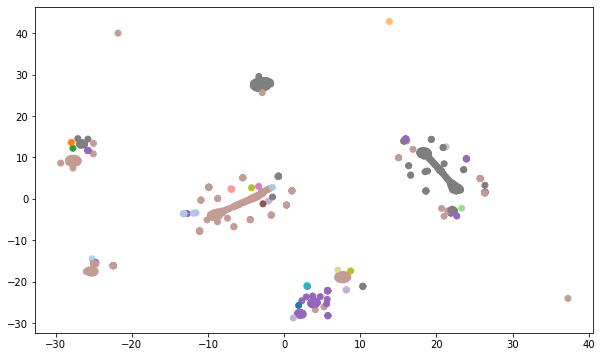

In [40]:
crypto_proof_names = crypto_df['ProofType']
new_list = [item[:4] for item in crypto_proof_names]
# new_list[0:20]

labels = LabelEncoder().fit_transform(new_list)
# set(crypto_df['ProofType'])

plt.figure(figsize=(10,6))
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'], c=labels, cmap='tab20')

### KMeans Clustering

In [42]:
model = KMeans(n_clusters=10, random_state=42)
model.fit(crypto_pca_df)
predictions = model.predict(crypto_pca_df)
print(predictions)

[1 6 6 4 0 3 5 3 0 0 2 7 4 4 7 1 2 7 1 6 7 7 4 3 7 6 1 6 3 1 7 1 7 2 3 6 7
 4 3 7 3 7 9 3 7 3 3 3 3 6 2 3 5 4 3 7 7 1 3 6 2 7 4 2 6 3 4 3 6 3 6 6 6 7
 3 3 2 5 4 7 4 1 5 4 4 4 2 6 6 3 3 2 3 5 7 4 6 6 0 0 3 2 3 4 6 3 2 3 6 7 2
 3 1 6 3 1 2 7 3 7 1 3 4 7 4 7 5 1 2 3 4 4 2 2 3 3 2 0 6 7 4 1 2 4 1 3 7 4
 5 3 4 4 6 1 2 2 7 7 4 5 2 4 3 9 7 2 5 4 4 6 5 7 9 6 1 6 6 2 2 0 5 6 0 4 4
 5 1 7 1 3 2 4 3 7 6 9 1 5 3 9 6 4 9 6 0 0 7 5 3 2 6 5 9 1 1 2 9 5 4 1 2 1
 1 5 0 1 2 1 1 1 3 7 0 3 1 4 5 1 2 1 3 2 3 7 6 2 0 6 3 3 2 4 5 6 5 3 9 5 6
 9 5 1 1 1 4 5 7 2 4 9 1 1 4 7 9 3 1 7 7 2 0 6 2 6 6 7 6 7 2 2 6 0 6 6 3 1
 2 2 6 4 5 6 3 7 9 3 7 7 3 3 1 1 0 2 2 5 0 3 2 1 3 2 0 6 4 6 1 7 1 1 3 2 1
 4 2 3 0 3 5 7 6 6 7 6 0 0 0 6 1 2 3 6 1 3 5 1 2 3 1 3 3 6 1 2 2 4 1 9 0 3
 0 2 6 0 3 7 2 6 8 3 7 3 2 1 6 5 1 2 2 0 0 7 4 6 1 1 0 2 3 2 9 1 7 2 1 9 0
 7 6 6 3 2 7 2 3 0 7 0 6 2 3 6 0 1 1 4 1 4 7 7 7 2 7 1 1 2 2 1 7 1 3 5 1 7
 2 5 2 9 4 1 2 2 6 2 7 9 0 1 3 4 1 2 0 1 7 7 0 6 3 1 0 1 0 1 6 3 2 1 1 6 5
 4 6 4 5 7 6 3 5 3 1 7 1 

C:\Users\Rob\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


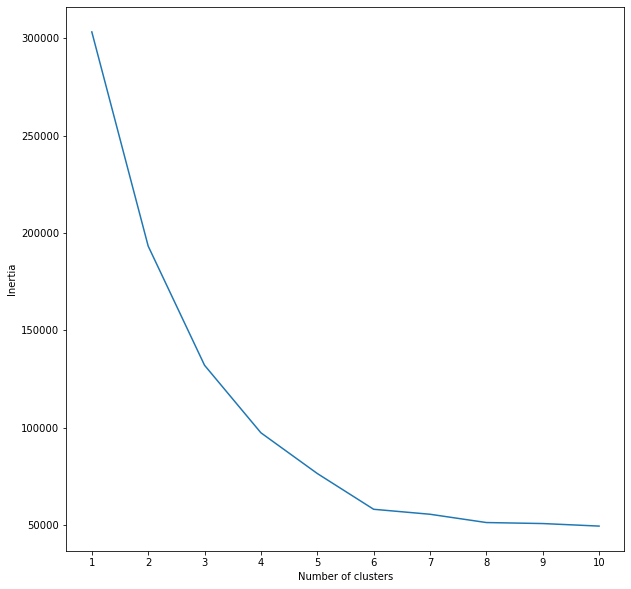

C:\Users\Rob\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


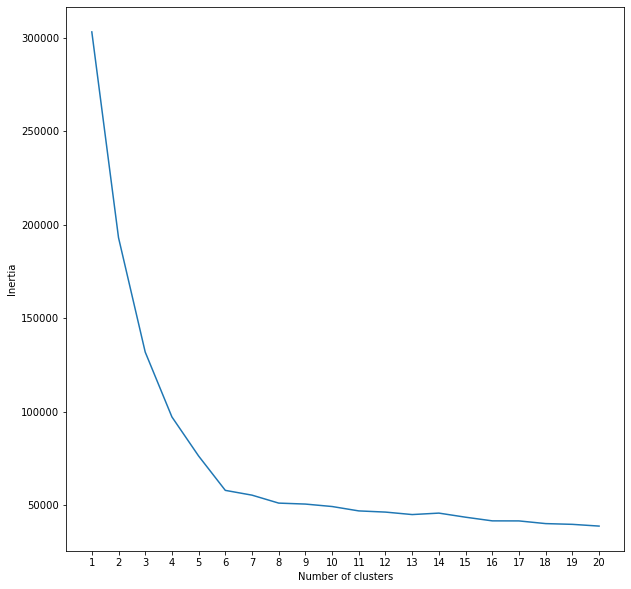

In [51]:
for end in [11,21]:
    inertia = []
    k = list(range(1,end))

    # Looking for the best k
    for i in k:
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(crypto_pca_df)
        inertia.append(km.inertia_)

    # Define a DataFrame to plot the Elbow Curve using hvPlot
    elbow_data = {"k": k, "inertia": inertia}
    df_elbow = pd.DataFrame(elbow_data)

    plt.figure(figsize=(10,10))
    plt.plot(df_elbow['k'], df_elbow['inertia'])
    plt.xticks(range(1,end))
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

### Recommendation
Based on the KMeans Clustering, it looks as though cryptocurrencies can be ideally clustered into 6 groups; this becomes a more apparent number if the range of clusters tested are extended to 20.  This also matches the number of clusters shown in the earlier t-SNE chart.